In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\Meghna\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
data=pd.read_csv(r'C:\Users\Meghna\Downloads\globalterrorism.csv')
df.head()

C:\Users\Meghna\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [6]:
data.shape

(181691, 135)

In [7]:
data.columns.values

array(['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended',
       'resolution', 'country', 'country_txt', 'region', 'region_txt',
       'provstate', 'city', 'latitude', 'longitude', 'specificity',
       'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3',
       'doubtterr', 'alternative', 'alternative_txt', 'multiple',
       'success', 'suicide', 'attacktype1', 'attacktype1_txt',
       'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt',
       'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt',
       'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2',
       'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2',
       'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt',
       'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3',
       'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2',
       'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2',
       'guncertain3', 'in

In [8]:
data.rename(columns = {'iyear':'Year','imonth':'Month','extended':'Extended','iday':'Day','country_txt':'Country_Name',
                   'provstate':'State','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                   'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                   'weaptype1_txt':'Weapon_type','motive':'Motive','city':'City','latitude':'Latitude','longitude':'Longitude'} , inplace = True)

In [9]:
data.head()

,eventid,Year,Month,Day,approxdate,Extended,resolution,country,Country_Name,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,1.970000e+11,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,1.970000e+11,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,1.970010e+11,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,1.970010e+11,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,1.970010e+11,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [10]:
#using necessary columns for data analysis and deleting the rest
data  = data[['Year','Month','Extended','Day','Country_Name','State','Region','City','Latitude','Longitude',
                 'AttackType','Killed','Wounded','Target','Summary','Group','Target_type','Weapon_type','Motive']]

In [11]:
data.head()

,Year,Month,Extended,Day,Country_Name,State,Region,City,Latitude,Longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive
0,1970,7,0,2,Dominican Republic,NaN,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN
1,1970,0,0,0,Mexico,Federal,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN
2,1970,1,0,0,Philippines,Tarlac,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN
3,1970,1,0,0,Greece,Attica,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN
4,1970,1,0,0,Japan,Fukouka,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN


In [12]:
#checking for null values
data.isnull().sum()

Year                 0
Month                0
Extended             0
Day                  0
Country_Name         0
State              421
Region               0
City               434
Latitude          4556
Longitude         4557
AttackType           0
Killed           10313
Wounded          16311
Target             636
Summary          66129
Group                0
Target_type          0
Weapon_type          0
Motive          131130
dtype: int64

In [13]:
data['Wounded'] = data['Wounded'].fillna(0)  #fillna to replace NaN values with 0
data['Killed'] = data['Killed'].fillna(0)

In [14]:
#creating new column casualties having data of killed and Wounded
data['Casualties'] = data['Killed'] + data['Wounded']

In [15]:
#checking the correlation
data.corr()

,Year,Month,Extended,Day,Latitude,Longitude,Killed,Wounded,Casualties
Year,1.000000,0.000139,0.091754,0.018254,0.166933,0.003917,0.021252,0.017484,0.020675
Month,0.000139,1.000000,-0.000468,0.005497,-0.015978,-0.003880,0.004031,0.003178,0.003805
Extended,0.091754,-0.000468,1.000000,-0.004700,-0.024749,0.000523,0.014586,-0.010175,-0.004570
Day,0.018254,0.005497,-0.004700,1.000000,0.003423,-0.002285,-0.003225,-0.001082,-0.001808
Latitude,0.166933,-0.015978,-0.024749,0.003423,1.000000,0.001463,-0.013170,0.015920,0.009899
Longitude,0.003917,-0.003880,0.000523,-0.002285,0.001463,1.000000,-0.000587,0.000205,0.000013
Killed,0.021252,0.004031,0.014586,-0.003225,-0.013170,-0.000587,1.000000,0.443326,0.651885
Wounded,0.017484,0.003178,-0.010175,-0.001082,0.015920,0.000205,0.443326,1.000000,0.968724
Casualties,0.020675,0.003805,-0.004570,-0.001808,0.009899,0.000013,0.651885,0.968724,1.000000


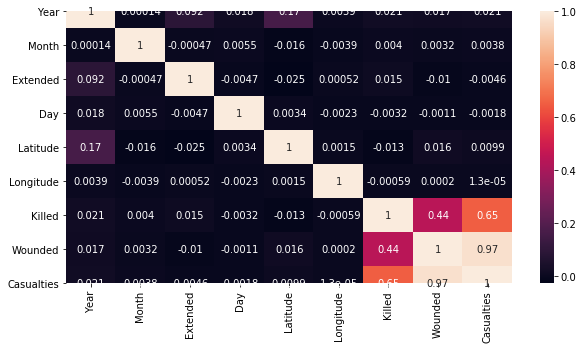

In [16]:
#creating a heatmap
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(),annot = True )
plt.show()

**Checking attacks in years**

In [17]:
Year_data = data['Year'].value_counts().sort_values() #to print attack counts in all years
Year_data

1971      471
1973      473
1972      568
1974      581
1970      651
1975      740
1976      923
1998      934
2004     1166
2003     1278
1977     1319
2002     1333
1999     1395
1978     1526
2000     1814
2001     1906
2005     2017
1982     2544
1981     2586
1980     2662
1979     2662
2006     2758
1986     2860
1983     2870
1985     2915
1996     3058
1995     3081
1987     3183
1997     3197
2007     3242
1994     3456
1984     3495
1988     3721
1990     3887
1989     4324
1991     4683
2009     4721
2008     4805
2010     4826
1992     5071
2011     5076
2012     8522
2017    10900
2013    12036
2016    13587
2015    14965
2014    16903
Name: Year, dtype: int64

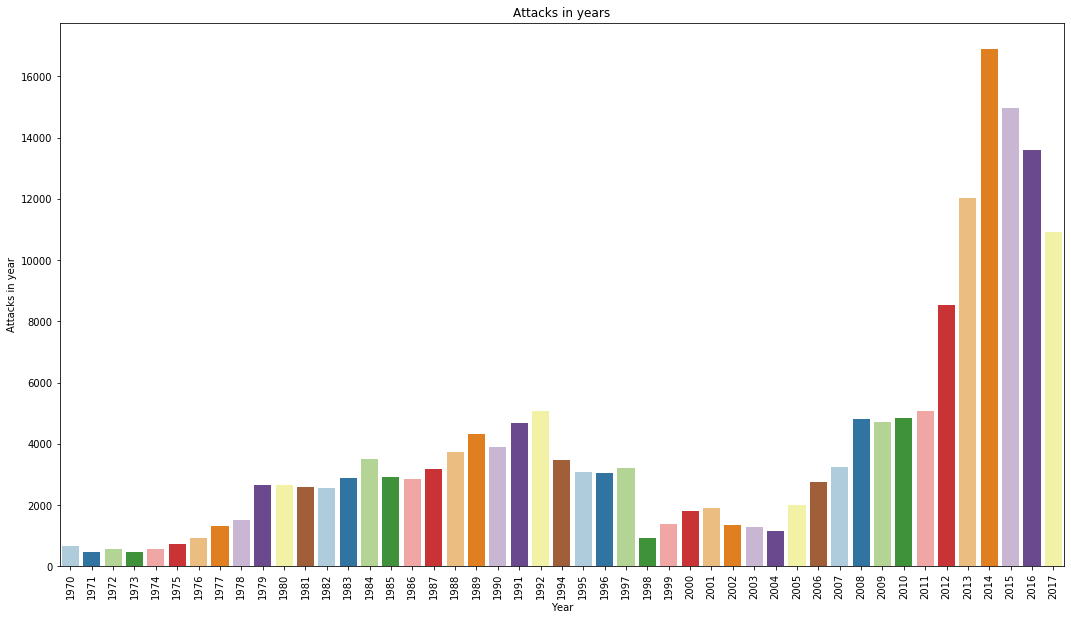

In [18]:
#Visualizing the data
plt.figure(figsize= (18,10))
sns.barplot(x = Year_data.index , y = Year_data.values,palette="Paired")
plt.title('Attacks in years')
plt.xlabel('Year')
plt.ylabel('Attacks in year')
plt.xticks(rotation = 90)
plt.show()

**From above graph we can conclude that , most attacks happened in the year 2014**

**Countries with most attacks**

In [19]:
# 15 countries with most attacks
Country_data = data['Country_Name'].value_counts().nlargest(n=15)
Country_data

Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Somalia            4142
Nigeria            3907
Thailand           3849
Yemen              3347
Spain              3249
Name: Country_Name, dtype: int64

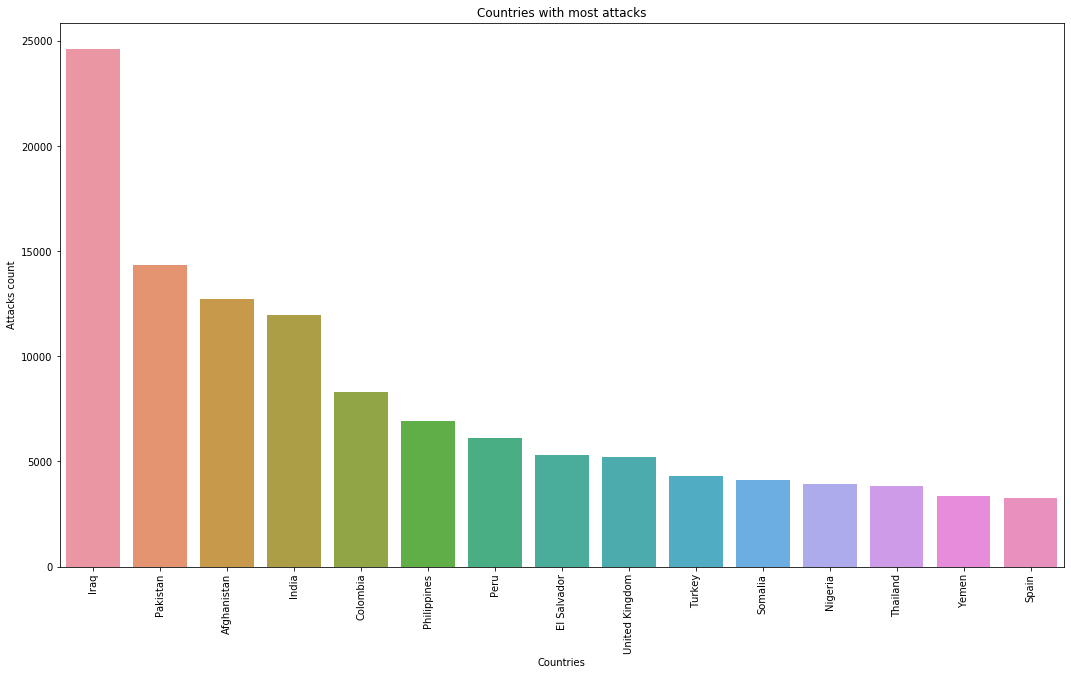

In [20]:
plt.figure(figsize= (18,10))
sns.barplot(x = Country_data.index , y = Country_data.values)
plt.title('Countries with most attacks')
plt.xlabel('Countries')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Top 3 Countries with most attacks are Iraq,Pakistan and Afganistan**

**States with most attacks**

In [21]:
# 15 States with most attacks
State_data = data['State'].value_counts().nlargest(n=15)
State_data

Baghdad                                7645
Northern Ireland                       4498
Unknown                                4290
Balochistan                            3710
Saladin                                3411
Al Anbar                               3299
Nineveh                                3241
Sindh                                  3206
Khyber Pakhtunkhwa                     3084
Diyala                                 3041
Lima                                   2615
Jammu and Kashmir                      2454
Federally Administered Tribal Areas    2392
San Salvador                           1923
Antioquia                              1891
Name: State, dtype: int64

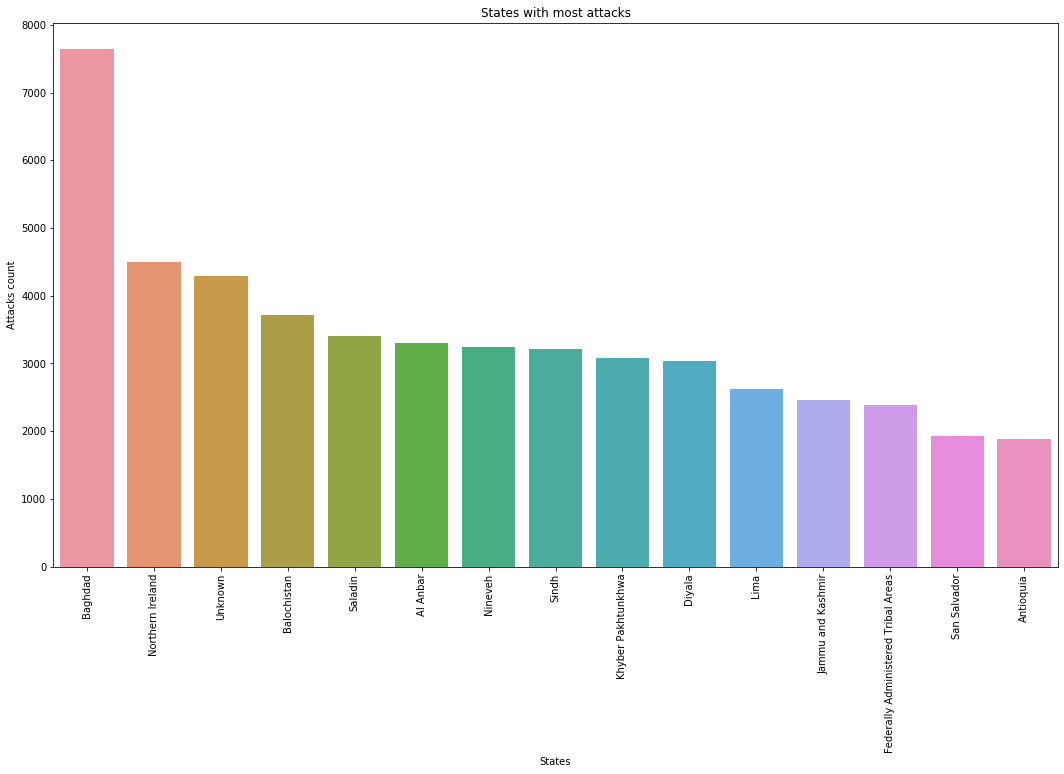

In [22]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = State_data.index , y = State_data.values)
plt.title('States with most attacks')
plt.xlabel('States')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Top 3 states with most attacks are Baghdad,Northern Ireland and Unknown state**

**Cities with most attacks**

In [23]:
# 15 States with most attacks
City_data = data['City'].value_counts().nlargest(n=15)
City_data

Unknown         9775
Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Bogota           984
Kirkuk           925
Beirut           918
Medellin         848
Name: City, dtype: int64

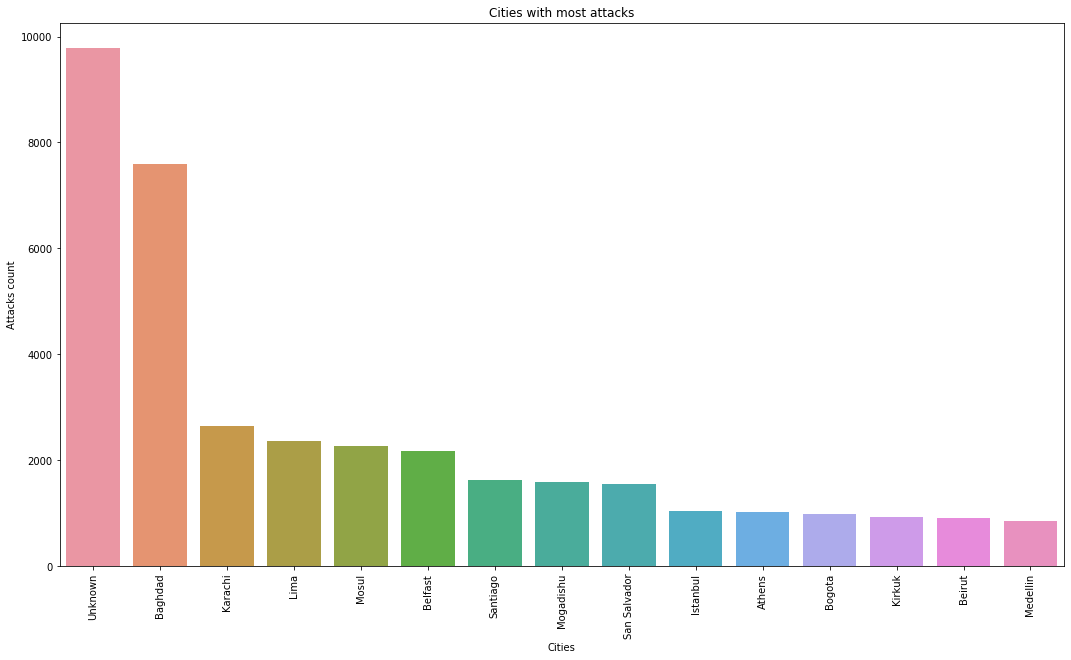

In [24]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = City_data.index , y = City_data.values)
plt.title('Cities with most attacks')
plt.xlabel('Cities')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Top 3 Cities with most attacks are Unknown city, Baghdad and Karachi.**

**Region with most attacks**

In [25]:
# 15 States with most attacks
Region_data = data['Region'].value_counts()
Region_data

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

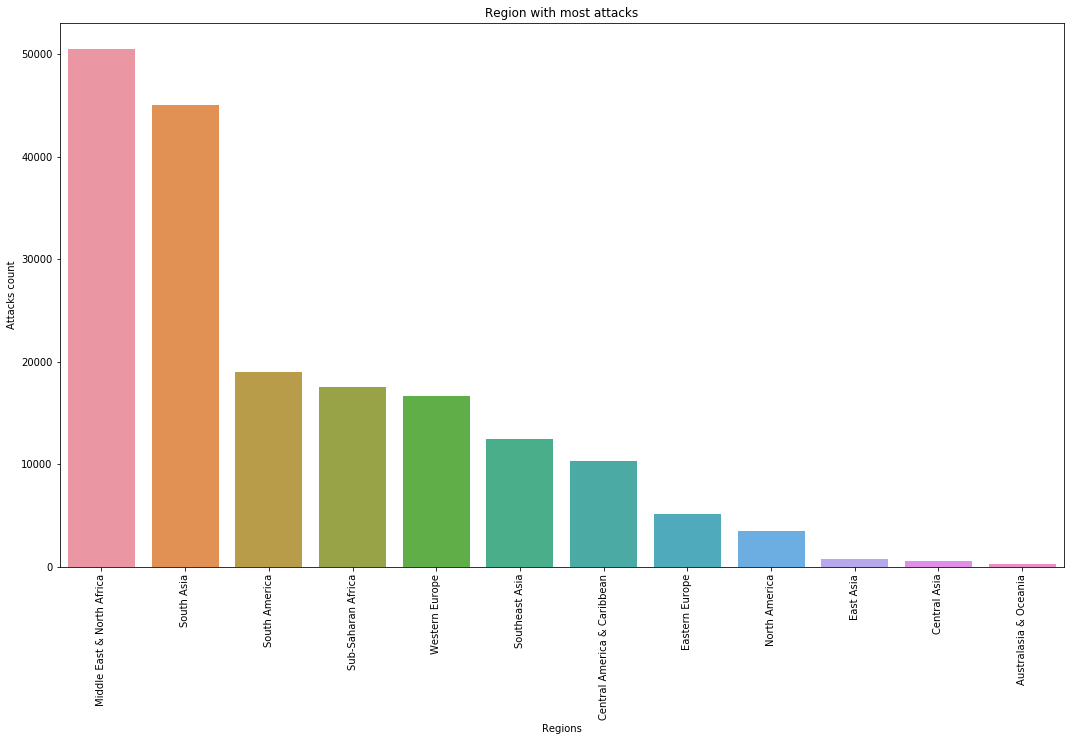

In [26]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Region_data.index , y = Region_data.values)
plt.title('Region with most attacks')
plt.xlabel('Regions')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Top 3 regions with most attacks are Middle East & North Africa , South Asia and South America.**

**Most used Attack type**

In [27]:
# Most frequent attck type
Attack_data = data['AttackType'].value_counts()
Attack_data

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

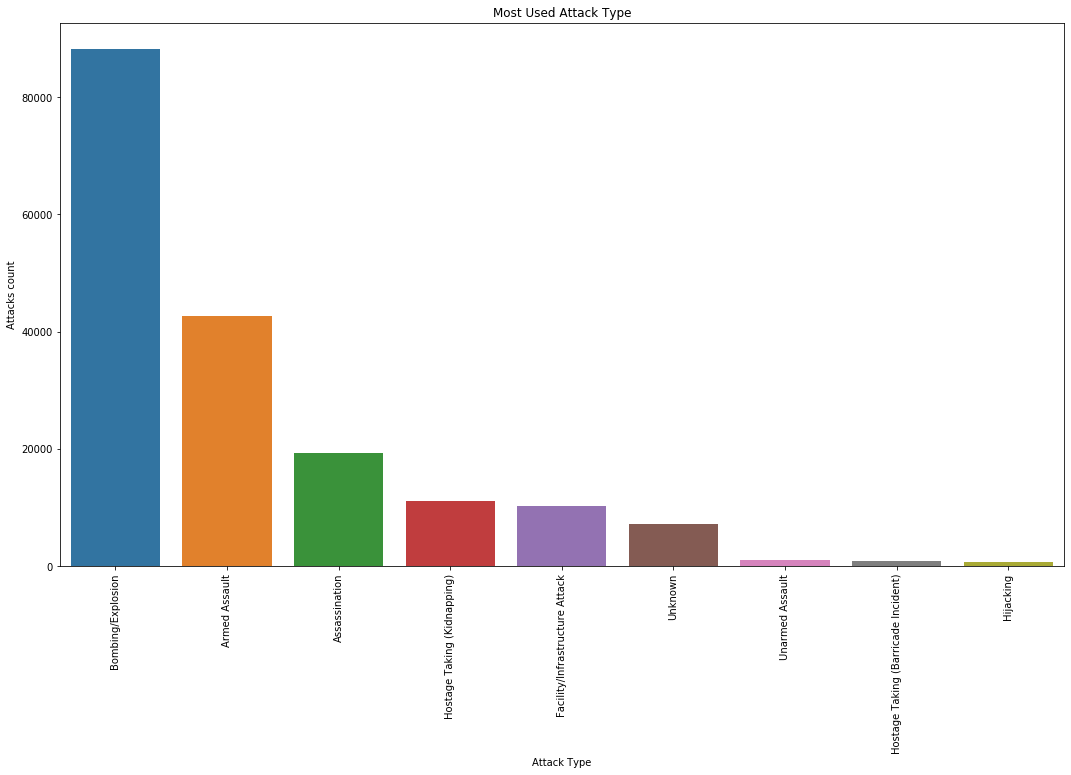

In [28]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Attack_data.index , y = Attack_data.values)
plt.title('Most Used Attack Type')
plt.xlabel('Attack Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Bombing/Explosion is the most used attck type**

**Most Frequent Terrorist Groups involved in Attacks**

In [29]:
Group_data = data['Group'].value_counts().nlargest(n=15)
Group_data

Unknown                                             82782
Taliban                                              7478
Islamic State of Iraq and the Levant (ISIL)          5613
Shining Path (SL)                                    4555
Farabundo Marti National Liberation Front (FMLN)     3351
Al-Shabaab                                           3288
New People's Army (NPA)                              2772
Irish Republican Army (IRA)                          2671
Revolutionary Armed Forces of Colombia (FARC)        2487
Boko Haram                                           2418
Kurdistan Workers' Party (PKK)                       2310
Basque Fatherland and Freedom (ETA)                  2024
Communist Party of India - Maoist (CPI-Maoist)       1878
Maoists                                              1630
Liberation Tigers of Tamil Eelam (LTTE)              1606
Name: Group, dtype: int64

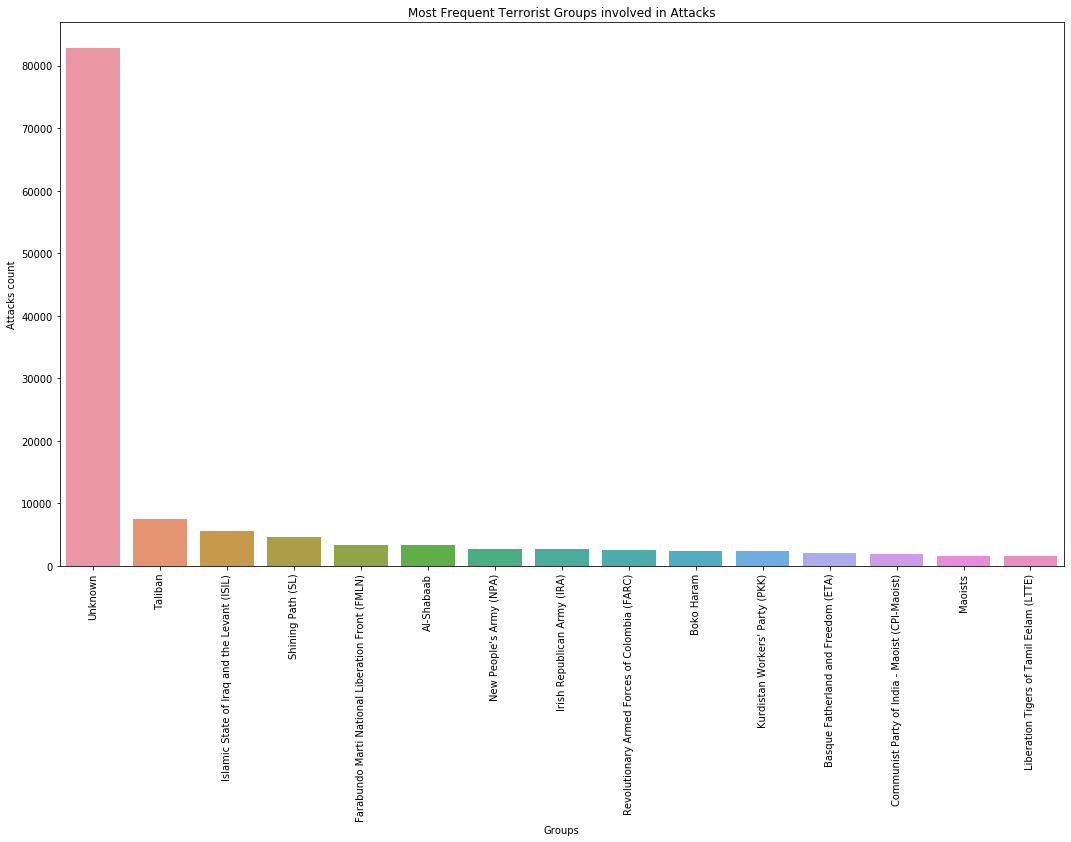

In [30]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Group_data.index , y = Group_data.values)
plt.title('Most Frequent Terrorist Groups involved in Attacks')
plt.xlabel('Groups')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Most Frequent Terrorist Group involved in Attacks is Taliban(first is Unknown)**

**Most Used Weapon Type**

In [31]:
Weapon_data = data['Weapon_type'].value_counts()
Weapon_data

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

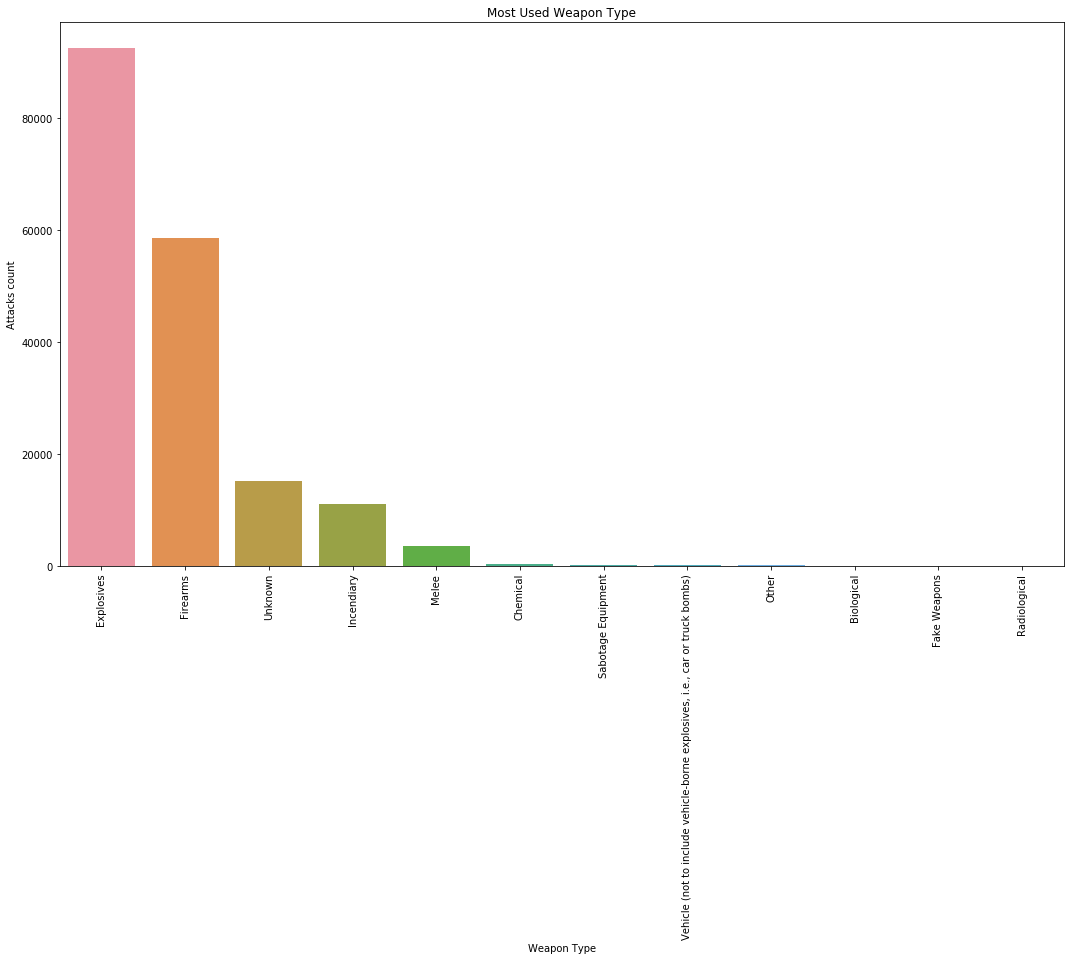

In [32]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Weapon_data.index , y = Weapon_data.values)
plt.title('Most Used Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Most used Weapon type is Explosives.**

**Most Frequent Target Type**

In [33]:
Target_data = data['Target_type'].value_counts().nlargest(n=15)
Target_data

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Name: Target_type, dtype: int64

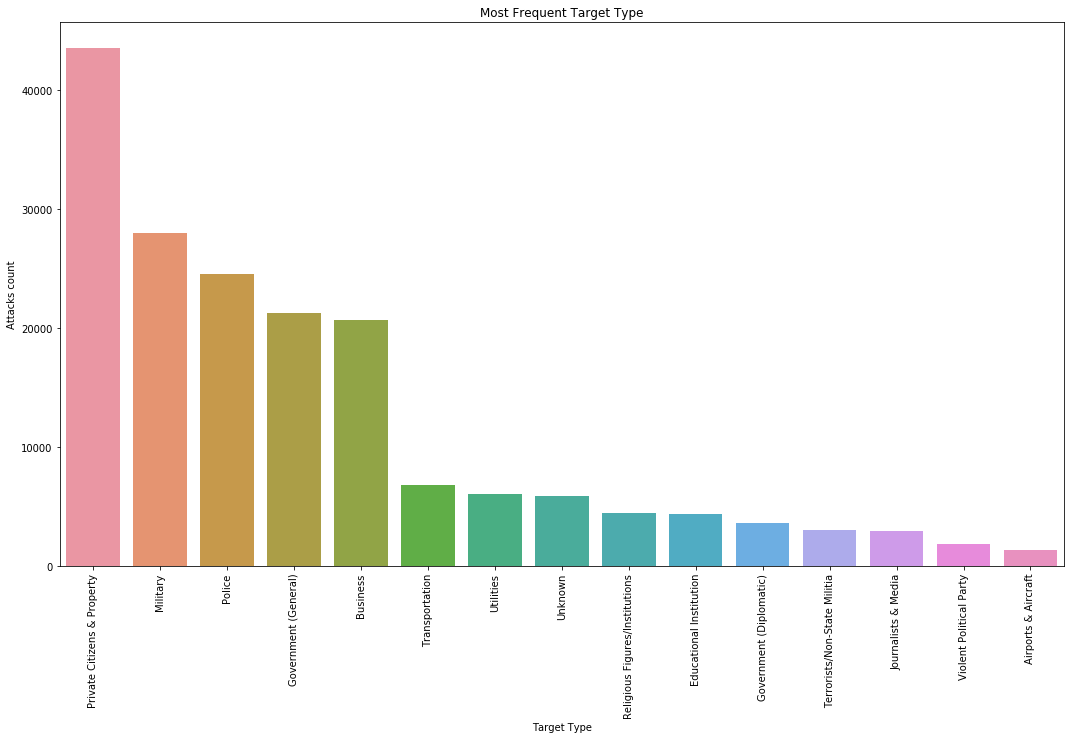

In [34]:
#Visualization
plt.figure(figsize= (18,10))
sns.barplot(x = Target_data.index , y = Target_data.values)
plt.title('Most Frequent Target Type')
plt.xlabel('Target Type')
plt.ylabel('Attacks count')
plt.xticks(rotation = 90)
plt.show()

**Most Frequent Target types are Private Citizens & Property.**

**Wounded vs Killed visualization**

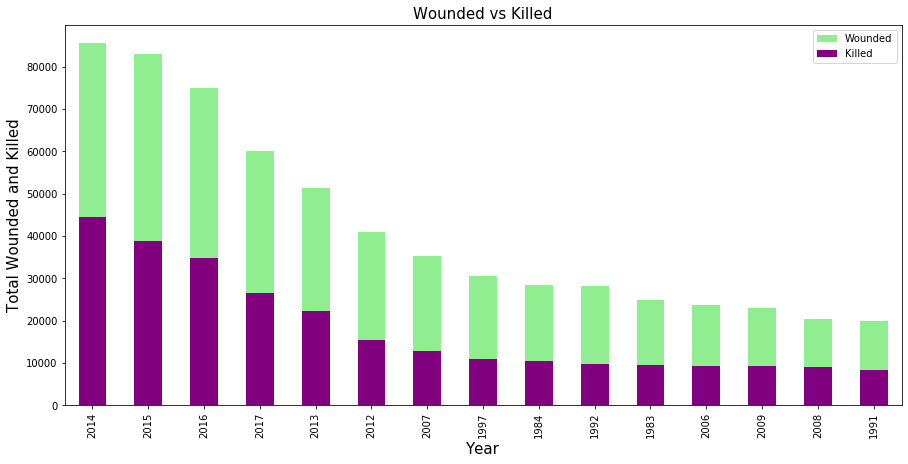

In [35]:
# Wounded vs Killed with respect to year
Casualty = data.groupby('Year').sum()['Casualties'].nlargest(n=15) #top 15 states with highest sales
killed = data.groupby('Year').sum()['Killed'].nlargest(n=15) #top 15 states with highest sales
# plt.style.use('seaborn')
Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightgreen', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='Purple', label = 'Killed')
plt.xlabel('Year',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

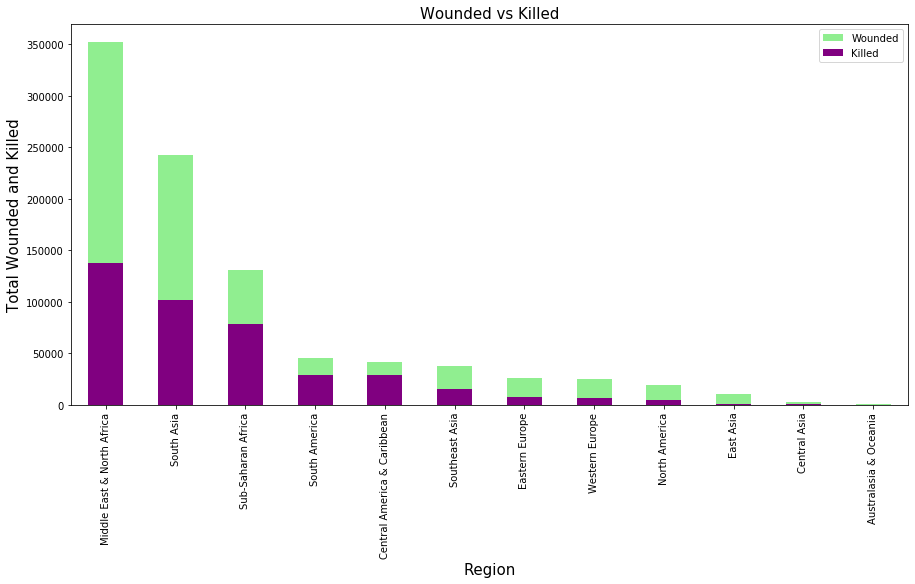

In [36]:
# Wounded vs Killed with respect to Region
Casualty = data.groupby('Region').sum()['Casualties'].nlargest(n=15) #top 15 states with highest sales
killed = data.groupby('Region').sum()['Killed'].nlargest(n=15) #top 15 states with highest sales
# plt.style.use('seaborn')
Casualty.plot(kind='bar', figsize=(15,7),fontsize = 10, color = 'lightgreen', label = 'Wounded')
killed.plot(kind='bar', figsize=(15,7),fontsize = 10 , color='Purple', label = 'Killed')
plt.xlabel('Region',fontsize = 15)
plt.legend()
plt.ylabel('Total Wounded and Killed',fontsize = 15)
plt.title("Wounded vs Killed",fontsize = 15)
plt.show()

**Conclusion :**

Hot zones are -
1)Top 3 Countries with most attacks are Iraq,Pakistan and Afganistan.
2)Top 3 states with most attacks are Baghdad,Northern Ireland and Unknown state.
3)Top 3 Cities with most attacks are Unknown city, Baghdad and Karachi.
4)Top 3 regions with most attacks are Middle East & North Africa , South Asia and South America.
5)Year with most attacks is 2014.
Most frequent terrorist groups involved in attacks are Taliban and Islamic State of Iraq and the Levant (ISIL).

Security issues and Insights drawn from the data are :
1] The most frequent attack found is Bombing/Explosion , we can protect attacks of this weapon type by -

Being alert in crowded places where explosions are most likely to happen.
Using Survillence cameras and security at crowded places to check for any suspicious activities.
Stopping terrorist from acquiring supplies.
2] Most frequent target types are Private Citizens & Property and Military.